# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [1]:
# Load pickled data
import pickle

# Assign file paths
training_file ='./train.p'
validation_file='./valid.p'
testing_file ='./test.p'

# Opens file and reads in binary mode
with open(training_file, mode='rb') as f:
    train = pickle.load(f)  # Loads dictionary of training data
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)

# Assign features and lables to appropriate X, y variables    
# Data type is uint8 format    
X_train8, y_train8 = train['features'], train['labels']
X_valid8, y_valid = valid['features'], valid['labels']
X_test8, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [2]:
import numpy as np

# Number of training examples
n_train8 = len(X_train8)

# Number of validation examples
n_validation = len(X_valid8)

# Number of testing examples.
n_test = len(X_test8)

# Shape of a traffic sign image
image_shape = X_train8[0].shape

# Number of labels
n_classes = len(np.unique(y_train8))

print("Number of training examples =", n_train8)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

24


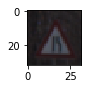

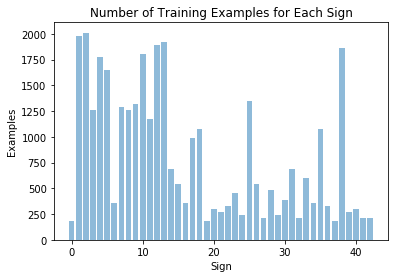

In [3]:
# Matplotlib for plotting visualizations
import matplotlib.pyplot as plt
# Random number generator library
import random
# Visualizations will be shown in the notebook.
%matplotlib inline

def show_rand_img(X, y):
    '''
    Show random image from X and print corresponding label from y
    '''
    # Create random integer index in range of the number of training examples
    index = random.randint(0, len(y))

    # Image based on random index
    image = X[index]

    # Create figure in 1 inch x 1 inch space
    plt.figure(figsize=(1, 1))
    plt.imshow(image)

    # Print corresponding value in csv
    print(y[index])

show_rand_img(X_train8, y_train8)

# Create blank figure
plt.figure()

# Creates histogram data where zero indexed array is number of examples per sign.
hist_train = np.histogram(y_train8,n_classes)
y_pos = np.arange(n_classes) # Number of bars
performance = hist_train[0] # Examples

# Barplot of number of examples for each type of sign.  
# Labels not uniformly distributed
plt.bar(y_pos, performance, align='center', alpha=0.5) 
plt.ylabel('Examples') 
plt.xlabel('Sign')
plt.title('Number of Training Examples for Each Sign')

plt.show()

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

18


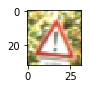

In [4]:
def norm32(X):
    """
    Normalize image and convert it to 32-bit floating point
    """
    norm = np.float32(128)
    return (X.astype(np.float32) - norm) / norm

# Normalize images
X_train_normed = norm32(X_train8)
X_valid = norm32(X_valid8)
X_test = norm32(X_test8)

def compare_img(X_change, X_old, y):
    '''
    Show random image from X and print corresponding label from y
    '''
    # Create random integer index in range of the number of training examples
    index = random.randint(0, len(y))

    # Image based on random index
    image = X_old[index]
    changed = X_change[index]
    
    # Create figure in 1 inch x 1 inch space
    plt.figure(figsize=(2, 2))
    plt.imshow(image)
    # Print corresponding value in csv
    print(y[index])
    
    plt.figure(figsize=(2, 2))
    plt.imshow(changed)
    # Print corresponding value in csv
    


# Show random normalized image and corr
compare_img(X_train_normed, X_train8, y_train8)

In [14]:
# To be used in rotation of images
import scipy.ndimage as scnd

def rotate_image(img):
    """
    Rotate image by random angle from Gaussian distribution with a stddev of 7, centered at zero.
    """
    
    # Create angle from random Gausian distribution with a stddev of 7, centered at zero 
    angle = np.random.normal(0., 7.)
   
    # Rotates pixel array, then essentially houses it inside larger scale blank pixel array
    rotated_img = scnd.interpolation.rotate(img, angle)
    
    # Rotation creates larger image; crop to 32x32:
    margin = rotated_img.shape[0] - 32 # New rows minus original number of rows
    start_crop = np.floor(margin / 2).astype(int) # Divide by 2 because edge added both sides
    end_crop = start_crop + 32 # Will take 32 rows past bgn_zoomed
    cropped_rotation_img = rotated_img[start_crop:end_crop, start_crop:end_crop, :] # Crop image
    
    return cropped_rotation_img

In [15]:
# n_train will eventually be at least 1500 labels; n_train8 original number 
n_train = n_train8
min_labels = 2100

# Figure out number of rotatated examples to add to dataset
for i in range(n_classes):
    
    # Calculate how many more examples are needed to have 2100 and add half to dataset
    rotated = np.floor((min_labels - hist_train[0][i]) * .5).astype(int)
    n_train += rotated
    
# Calculate total added examples across all labels
total_add = n_train - n_train8

# Create memmory space from images
X_train_rot = np.zeros((total_add, image_shape[0], image_shape[1], image_shape[2]))
y_train_rot = np.zeros(total_add, dtype=int)
    
# Index for all new examples    
rotated_i = 0

# Choose label for additions
for i in range(n_classes):
    rotated = np.floor((min_labels - hist_train[0][i]) * .5).astype(int)
    select_from_array = X_train_normed[y_train8 == i]

    # Add a new image by picking a random existing example and rotating it.
    for j in range(rotated):
        index = random.randint(0, hist_train[0][i] - 1)
        X_train_rot[rotated_i] = rotate_image(select_from_array[index]) # Rotate image
        y_train_rot[rotated_i] = i  # Create corresponding y label
        rotated_i += 1  # Tracks total index
            
# Create full training data by concatenating original and rotated data            
X_train = np.concatenate((X_train_normed, X_train_rot))
y_train = np.concatenate((y_train8, y_train_rot))

print("New total training set = {}".format(X_train.shape))

Rotated training set = (67380, 32, 32, 3)


42


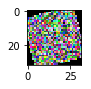

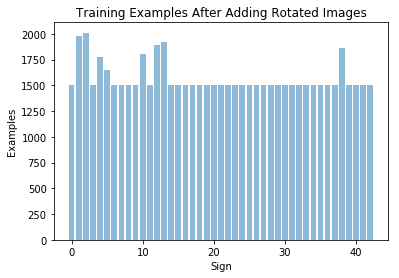

In [16]:
# Visualize one of the rotated images and label:
show_rand_img(X_train_rot, y_train_rot)

# Barplot of number of examples for each type of sign.  
plt.figure()

# Creates histogram data where zero indexed array is number of examples per sign.
hist_train_rot = np.histogram(y_train, n_classes)
y_pos = np.arange(n_classes) # Number of bars
performance = hist_train_rot[0] # Examples
plt.bar(y_pos, performance, align='center', alpha=0.5) # Bar plot
plt.ylabel('Examples') 
plt.xlabel('Sign')
plt.title('Training Examples After Adding Rotated Images')

plt.show()

In [12]:
# Shuffle data to reduce overfitting
from sklearn.utils import shuffle

X_train, y_train = shuffle(X_train, y_train)


In [16]:
# Tensorflow
import tensorflow as tf

# Hyperparameters
EPOCHS = 80 # Number of times through the nn
BATCH_SIZE = 256 # Examples pulled randomly per epoch
rate = 0.000933 # Learning rate for amount weights should update
dropout = .76  # Percent of net retained at random for dropout layers (keep_prob)

### Model Architecture

In [17]:
from tensorflow.contrib.layers import flatten

# Added a keep_prob for dropout layers to the argument list.
def DunLeNet(x, keep_prob):  
    """
    This is the LeNet architecture with added dropout layers. 
    My last name is 'Dunlap' so I'm named this 'DunLeNet' because life is about the little things.
    """
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1

    # Layer 1: Convolutional. Input = 32x32x3. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 3, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    # Activation.
    conv1 = tf.nn.relu(conv1)
    
    # Dropout.
    conv1 = tf.nn.dropout(conv1, keep_prob)

    # Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)
    
    # Dropout.
    conv2 = tf.nn.dropout(conv2, keep_prob)
                          
    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    # Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    # Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    # Activation.
    fc1    = tf.nn.relu(fc1)
    
    # Dropout.
    fc1 = tf.nn.dropout(fc1, keep_prob)

    # Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    # Activation.
    fc2    = tf.nn.relu(fc2)
    
    #Dropout.
    fc2 = tf.nn.dropout(fc2, keep_prob)
    
    # Layer 5: Fully Connected. Input = 84. Output = 43.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [18]:
# Placeholder variables initialized in memmory to be used during training
x = tf.placeholder(tf.float32, (None, 32, 32, 3)) # Images
y = tf.placeholder(tf.int32, (None)) # Labels
keep_prob = tf.placeholder(tf.float32) # Percent of layer retained in dropout
one_hot_y = tf.one_hot(y, n_classes) # One-hot encoding


In [19]:
# Taken from LeNet lab;
# Define network calculations
logits = DunLeNet(x, keep_prob)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(labels=one_hot_y, logits=logits)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [20]:
# These are also taken from the LeNet lab to begin with.
correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

# Define accuracy evalutaion
def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={
            x: batch_x, 
            y: batch_y,
            keep_prob: 1.0})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [17]:
# From LeNet Lab
# Trains model and calculates accuracy on the training and validation set.
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_train)
    print("Training with {} examples...".format(num_examples))
    print()
    for i in range(EPOCHS):
        X_train, y_train = shuffle(X_train, y_train)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_train[offset:end], y_train[offset:end]
            sess.run(training_operation, feed_dict={
                x: batch_x, 
                y: batch_y,
                keep_prob: dropout})

        print("EPOCH {} ...".format(i+1))   
        training_accuracy = evaluate(X_train, y_train)
        print("Training Accuracy   = {:.3f}".format(training_accuracy))
        validation_accuracy = evaluate(X_valid, y_valid)
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training with 51690 examples...

EPOCH 1 ...
Training Accuracy   = 0.830
Validation Accuracy = 0.739

EPOCH 2 ...
Training Accuracy   = 0.917
Validation Accuracy = 0.841

EPOCH 3 ...
Training Accuracy   = 0.954
Validation Accuracy = 0.875

EPOCH 4 ...
Training Accuracy   = 0.961
Validation Accuracy = 0.902

EPOCH 5 ...
Training Accuracy   = 0.974
Validation Accuracy = 0.911

EPOCH 6 ...
Training Accuracy   = 0.982
Validation Accuracy = 0.917

EPOCH 7 ...
Training Accuracy   = 0.983
Validation Accuracy = 0.926

EPOCH 8 ...
Training Accuracy   = 0.983
Validation Accuracy = 0.922

EPOCH 9 ...
Training Accuracy   = 0.989
Validation Accuracy = 0.921

EPOCH 10 ...
Training Accuracy   = 0.990
Validation Accuracy = 0.925

EPOCH 11 ...
Training Accuracy   = 0.993
Validation Accuracy = 0.938

EPOCH 12 ...
Training Accuracy   = 0.993
Validation Accuracy = 0.940

EPOCH 13 ...
Training Accuracy   = 0.994
Validation Accuracy = 0.939



KeyboardInterrupt: 

## Determine accuracy on test set
Don't run this until you're finished tuning on the validation set!

In [ ]:
with tf.Session() as sess:
    saver.restore(sess, './lenet')
    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

uint8
Image 0 = 100km_sign.jpeg
Image 1 = 70km_sign.jpg
Image 2 = right_turn_ahead.jpg
Image 3 = Do-Not-Enter_Sign.jpg
Image 4 = children-crossing.jpg


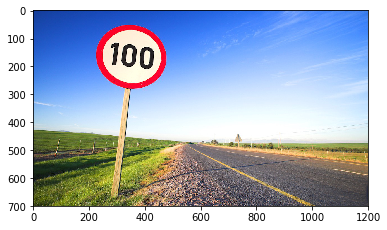

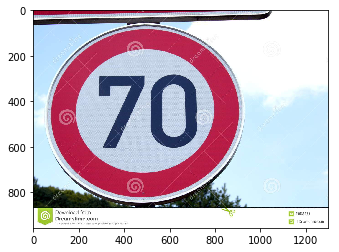

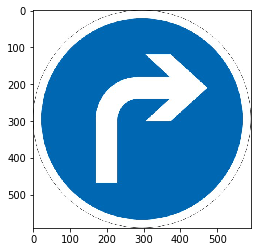

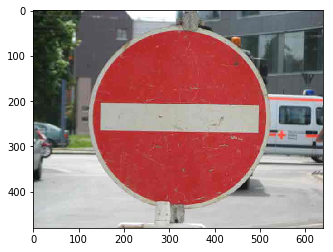

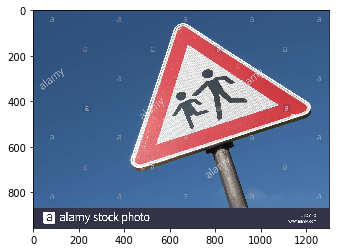

In [13]:
# Plotting data
import matplotlib.image as mpimg
# To resize image
import scipy.misc as scms

# Blanks for the 5 web images.
X_new8 = np.zeros((5, 32, 32, 3), dtype=np.uint8)
print(X_new8.dtype)

dir = 'new_images/'
names = ['30km_sign.JPG','70km_sign.jpg','right_turn_ahead.jpg','Do-Not-Enter_Sign.jpg','stop_sign.jpg']

y_new = np.array([1, 4, 33, 17, 14,])

for name, i in zip(names, range(5)):
    image = mpimg.imread(dir + name)
    print("Image {} = {}".format(i, name))
    plt.figure()
    plt.imshow(image)
    
    # Resize to 32x32 and store in the array of test data
    resized_image = scms.imresize(image, (32, 32, 3))
    X_new8[i] = resized_image

### Predict the Sign Type for Each Image

In [15]:
# Data splitting with seed from reproducibility
np.random.seed(seed=1) 

# Size of the train subset
size_train = int(.8 * n_train)  # 80% 

# Generate a mask and subsample training and validation sets
mask = np.random.permutation(np.arange(n_train))[:size_train]
X_train_sub, y_train_sub = X_train[mask], y_train[mask]
X_val = np.delete(X_train, mask,0)
y_val = np.delete(y_train, mask, 0)
n_train_sub = len(y_train_sub)
n_val = len(y_val)
print("Training set = ", n_train_sub)
print("Validation set = ", n_val)

Number of images in the train dataset =  43544
Number of images in the validation dataset =  10886


In [21]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.

# Create normalized, zero-mean versions of web images

X_new = norm32(X_new8)

prediction = tf.argmax(logits, 1)

# Redeclare in case you want to run this cell alone.
saver = tf.train.Saver()

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, './lenet')
    output = sess.run(prediction, feed_dict={
        x: X_new, 
        keep_prob: 1.0})
  
   
print('Prediction: ', output)
print("True Answer: [ 1  4 33 17 14]")

NotFoundError: Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./lenet
	 [[Node: save_1/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_1/Const_0, save_1/RestoreV2/tensor_names, save_1/RestoreV2/shape_and_slices)]]

Caused by op 'save_1/RestoreV2', defined at:
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/ioloop.py", line 888, in start
    handler_func(fd_obj, events)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tornado/stack_context.py", line 277, in null_wrapper
    return fn(*args, **kwargs)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 283, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 235, in dispatch_shell
    handler(stream, idents, msg)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/kernelbase.py", line 399, in execute_request
    user_expressions, allow_stdin)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2728, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2850, in run_ast_nodes
    if self.run_code(code, result):
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/IPython/core/interactiveshell.py", line 2910, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-21-29dbaef7b29d>", line 19, in <module>
    saver = tf.train.Saver()
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1051, in __init__
    self.build()
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 1081, in build
    restore_sequentially=self._restore_sequentially)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 675, in build
    restore_sequentially, reshape)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 402, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/training/saver.py", line 242, in restore_op
    [spec.tensor.dtype])[0])
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/ops/gen_io_ops.py", line 668, in restore_v2
    dtypes=dtypes, name=name)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/op_def_library.py", line 763, in apply_op
    op_def=op_def)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 2395, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "/Users/tomdunlap/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/tensorflow/python/framework/ops.py", line 1264, in __init__
    self._traceback = _extract_stack()

NotFoundError (see above for traceback): Unsuccessful TensorSliceReader constructor: Failed to find any matching files for ./lenet
	 [[Node: save_1/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_recv_save_1/Const_0, save_1/RestoreV2/tensor_names, save_1/RestoreV2/shape_and_slices)]]


### Analyze Performance

In [4]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.
with tf.Session() as sess:
    saver.restore(sess,'./lenet')
    accuracy = sess.run(accuracy_operation, feed_dict={
            x: X_new, 
            y: y_new,
            keep_prob: 1.0})
    print( "Accuracy = {}%".format( accuracy * 100. ))

### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tf.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [3]:

# Choose five top softmax probabilities
top_k_getter = tf.nn.top_k(tf.nn.softmax(logits), 5)

with tf.Session() as sess:
    # Load the weights and bias
    saver.restore(sess, './lenet')
    output = sess.run(top_k_getter, feed_dict={
        x: X_new, 
        keep_prob: 1.0})

# Create bar charts with listed probabilities
for i in range(5):
    plt.figure()
    y_pos = np.arange(len(output.indices[i]))
    plt.bar(y_pos, output.values[i], align='center', alpha=0.5)
    plt.xticks(y_pos, output.indices[i])
    
    # Probabilities formatted as a string so they align with bar chart labels.
    plt.xlabel("P =" +  str(['{0:.7f}'.format(x) for x in output.values[i]]))
    plt.title("{}, label = {}".format(names[i], y_new[i]))

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

---

## Step 4 (Optional): Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.
